In [309]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Features and their Details
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,    Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



# 1. Data Ingestion 

In [310]:
# reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv",header = None,na_values='?',)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [311]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Output']

In [312]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [313]:
#checking out the shape
df.shape

(48842, 15)

In [314]:
# Checking out the datatypes of independent features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  Output          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [315]:
# Checking the null values
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
Output               0
dtype: int64

In [316]:
#checking out the percentage of the total missing values in 3 columns
for features in ('workclass','occupation','native-country'):
    print("{} has {}% missing values".format(features,np.round(df[features].isnull().mean(),4)))

workclass has 0.0573% missing values
occupation has 0.0575% missing values
native-country has 0.0175% missing values


In [317]:
# since null values are very less we can drop the value
df.dropna(inplace = True)

In [318]:
#Lets now check the unique values of each column
features = [feature for feature in df.columns]
features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Output']

In [319]:
for i in features:
    print(i,df[i].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
fnlwgt [ 77516  83311 215646 ... 173449  89686 350977]
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
education-num [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces'

## Observation
- Seems like it all the values in each columns are alright.

In [320]:
# Lets now separate the numerical and categorical features
numerical_feature = [feature for feature in df.columns if df[feature].dtypes!='O']
numerical_feature

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [321]:
#separating out the categorical feature
categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O' and feature!='Output']
categorical_feature

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

# 2. Exploratory Data Analysis

### 2.1 Univariate Analysis

#### Numerical Features 

In [323]:
#Lets first check the numerical features and their distribution
numerical_feature

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

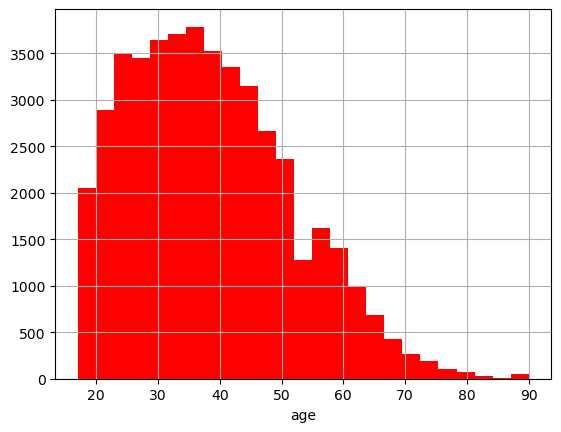

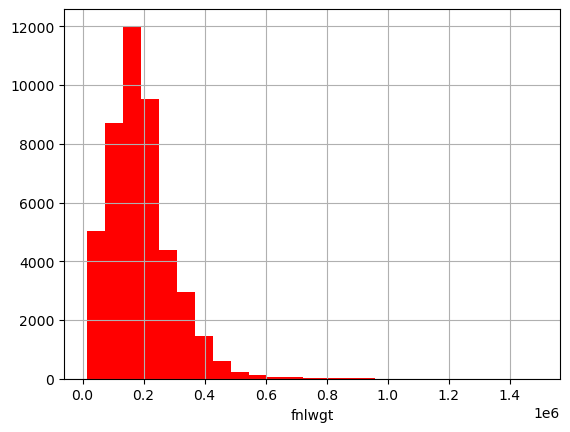

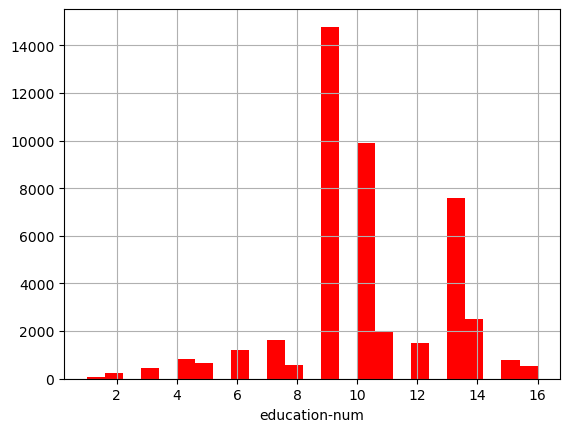

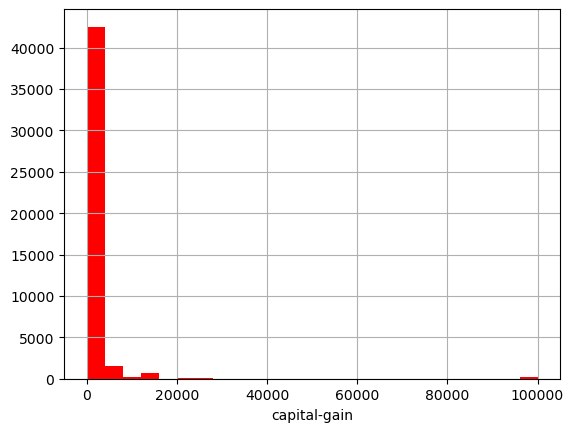

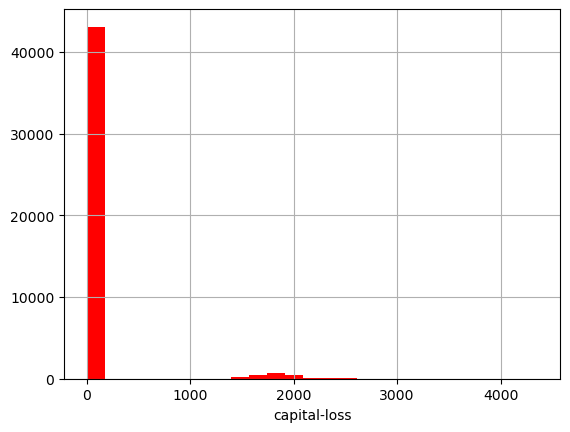

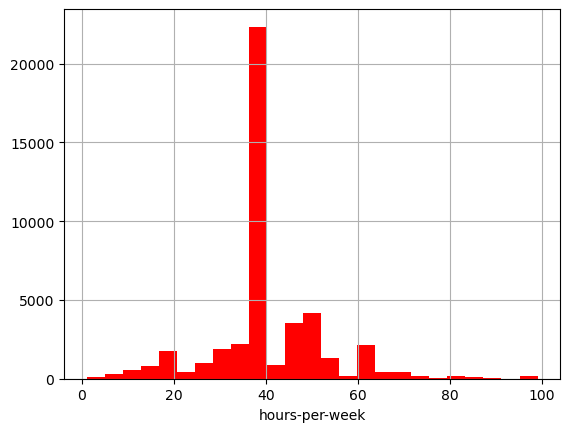

In [324]:
#Plotting histogrames for all the numerical features
for feature in numerical_feature:
    data = df.copy()
    data[feature].hist(bins =25,color = "red")
    plt.xlabel(feature)
    plt.show()

### Observation
- Data seems to be normally distributed, other than education-num column

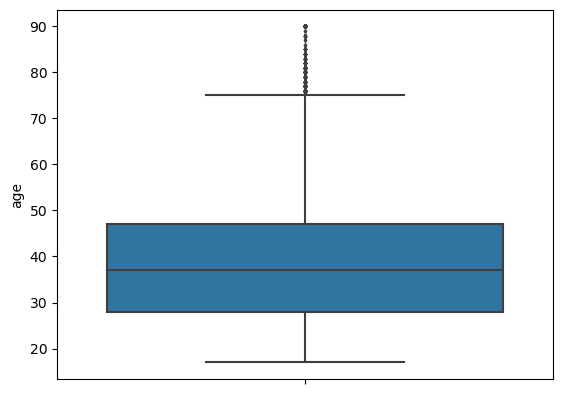

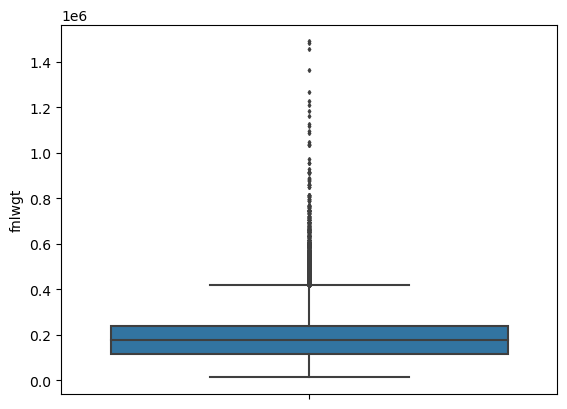

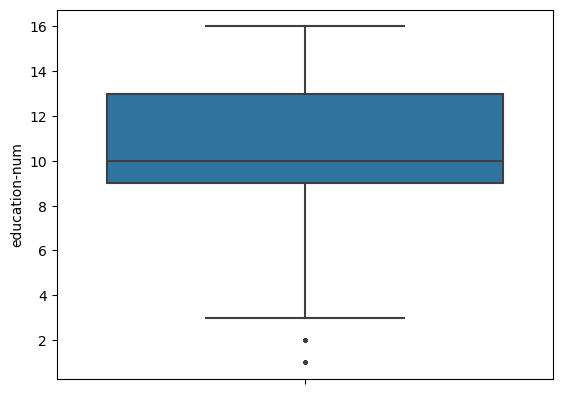

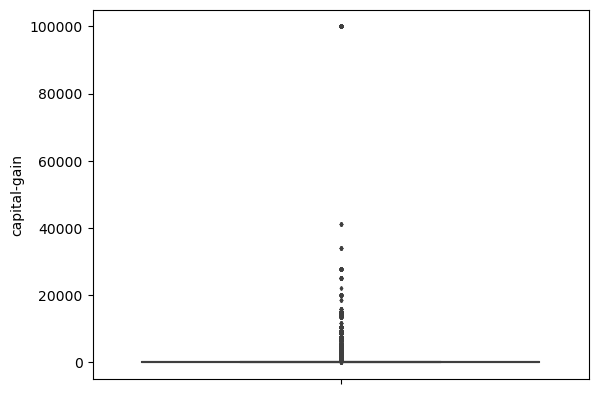

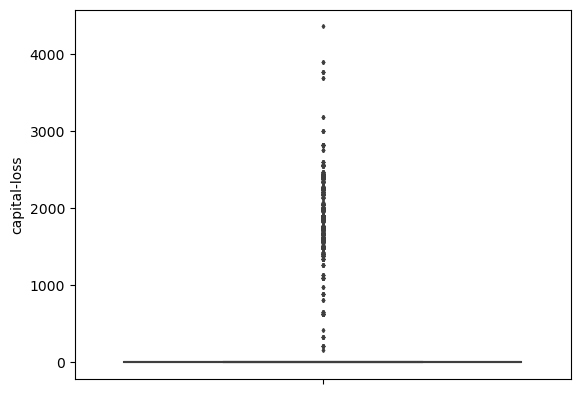

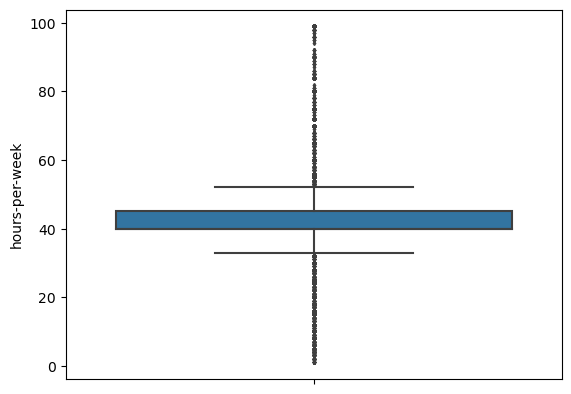

In [325]:
# Lets check the box plots of each of the numerical features
for feature in numerical_feature:
    sns.boxplot(data = df,y = feature,fliersize=2)
    plt.show()

### Observation
 - For age column above 75 years are considered to be outliers
 - Education num has only 2 outliers which can be ignored
 - For capital gain and capital loss the distribution is very less which in case results in many outliers

#### Categorical Features 

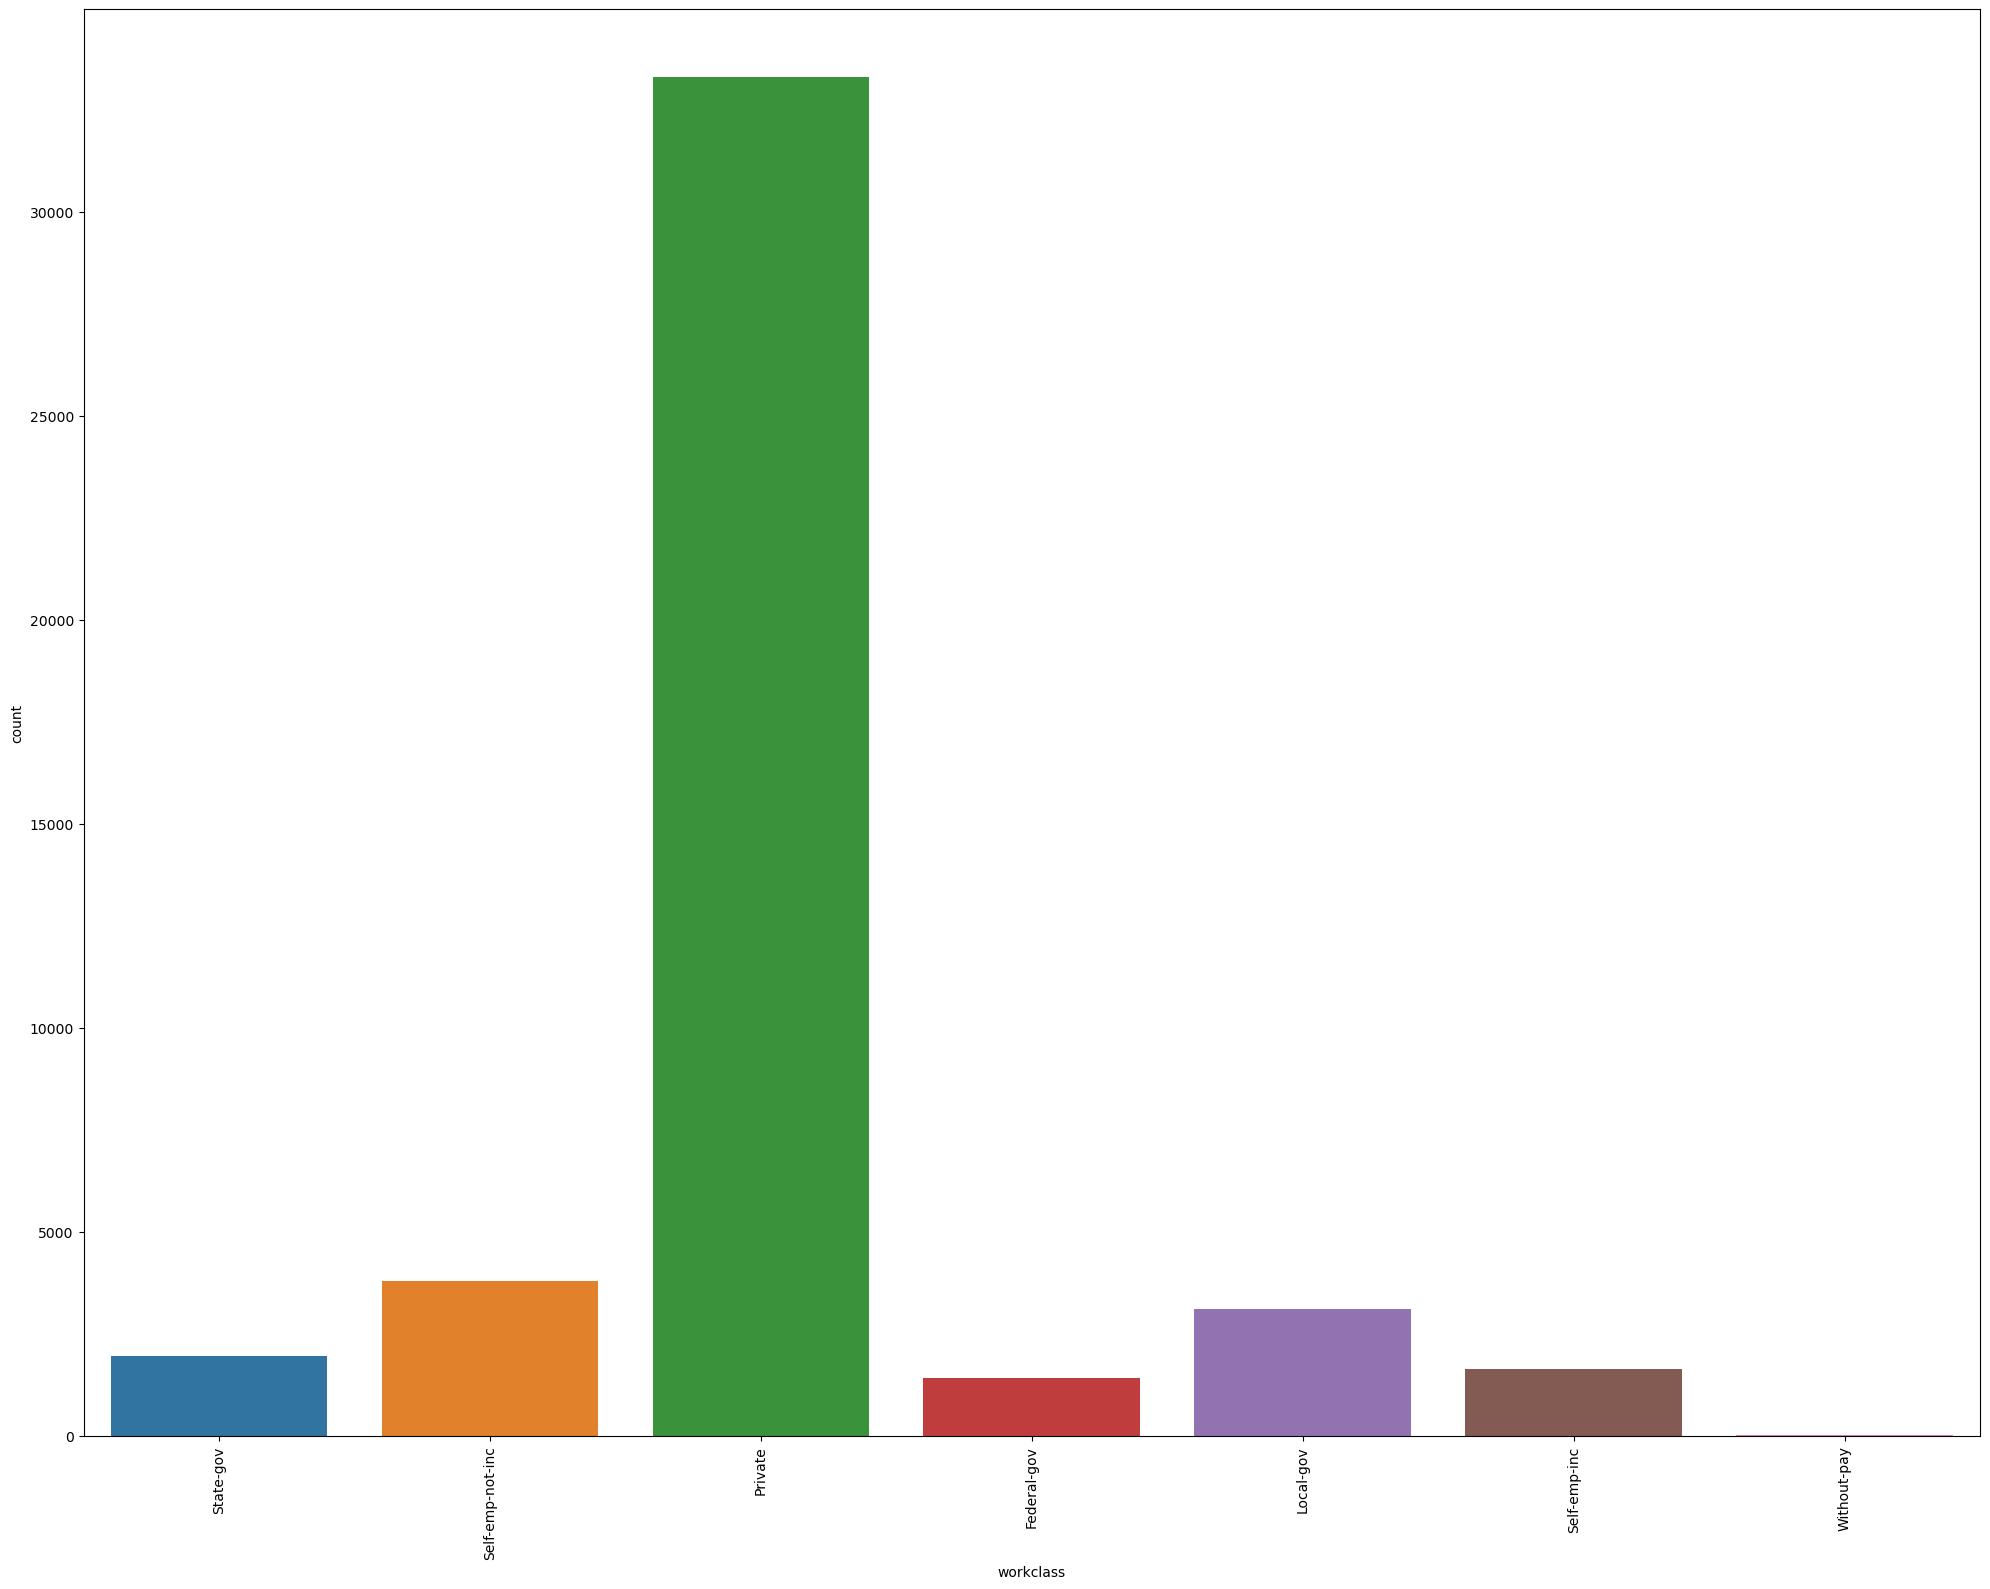

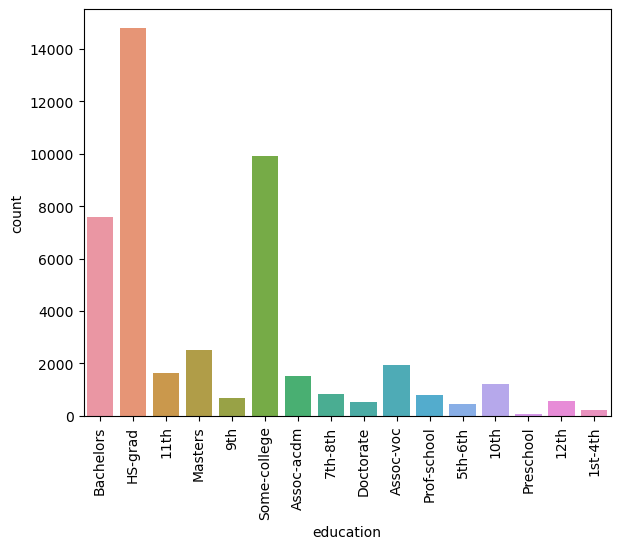

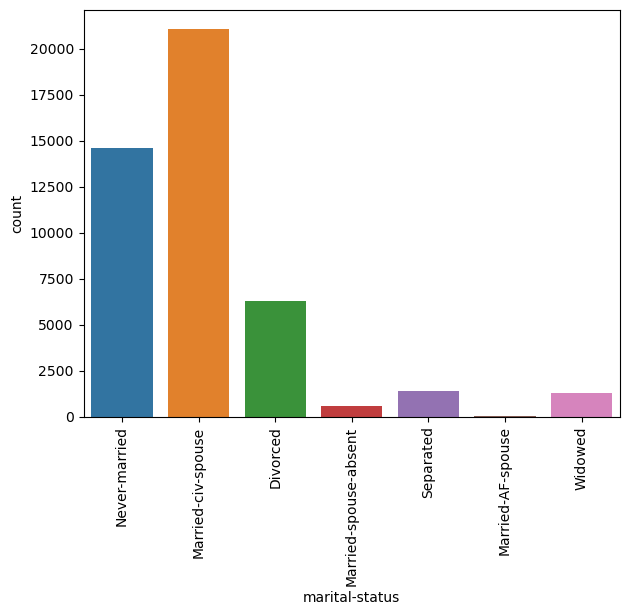

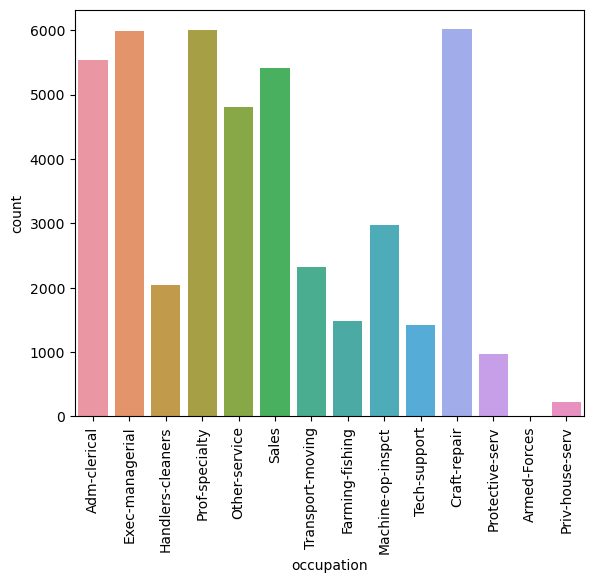

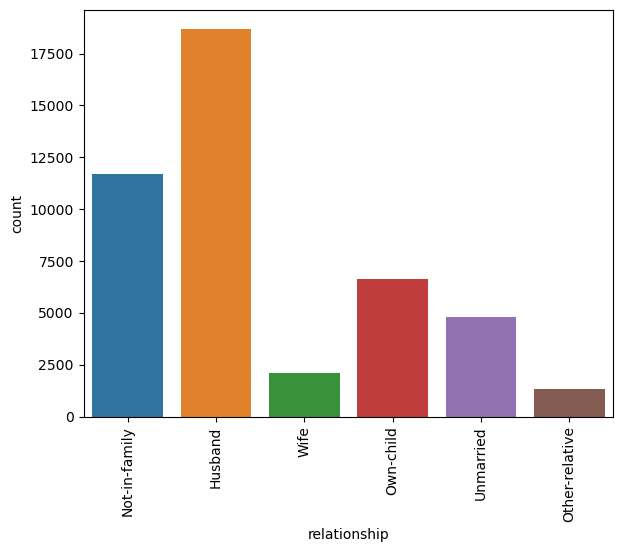

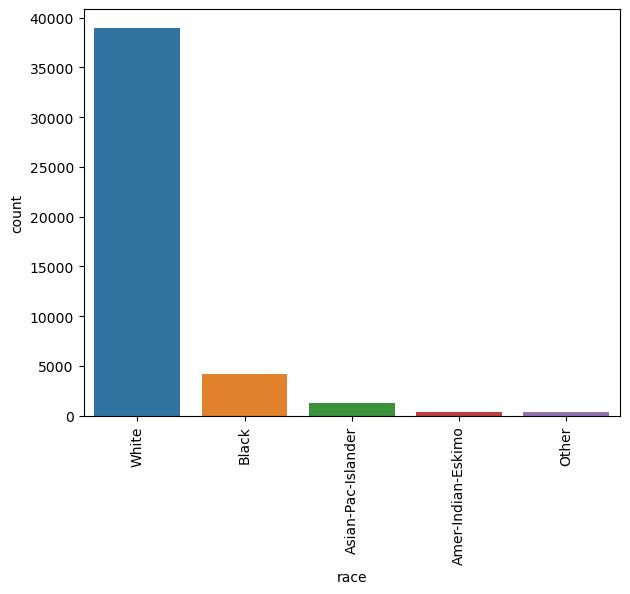

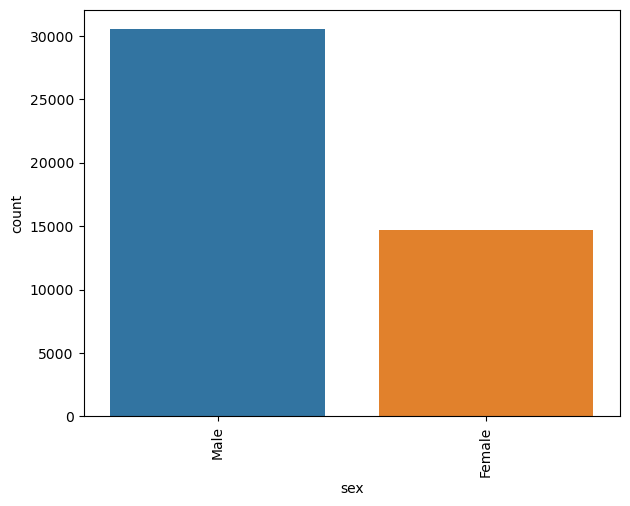

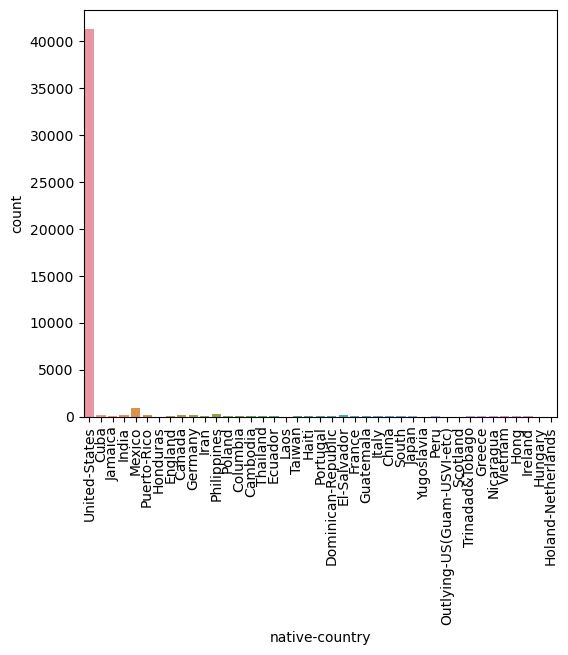

In [326]:
# We can check out the categorical features now
plt.figure(figsize=(20,15))
for feature in categorical_feature:
    sns.countplot(data = df,x = feature)
    plt.tight_layout()
    plt.xticks(rotation = 90,)
    plt.show()

### Observation 
 - The most number of people surveyed are for private workclass and there are very without pay workclass
 - Most of the people are HS-grad or have Some-college education
 - The count of Married people are more.
 - Many of the occupation types have similar kind of distribution including Craft-repair,Adm-clerical,Exec-managerial,prof-speciality,sales
 - Most of the surveyed persons were Husbands and the next one which came closer were not in family.
 - White race is predominantly surveyed
 - Males have a high ration of survey rate with respect to female
 - Most of the people that have been surveyed are having native-country as United States

## 2.2 Bi-variate Analysis

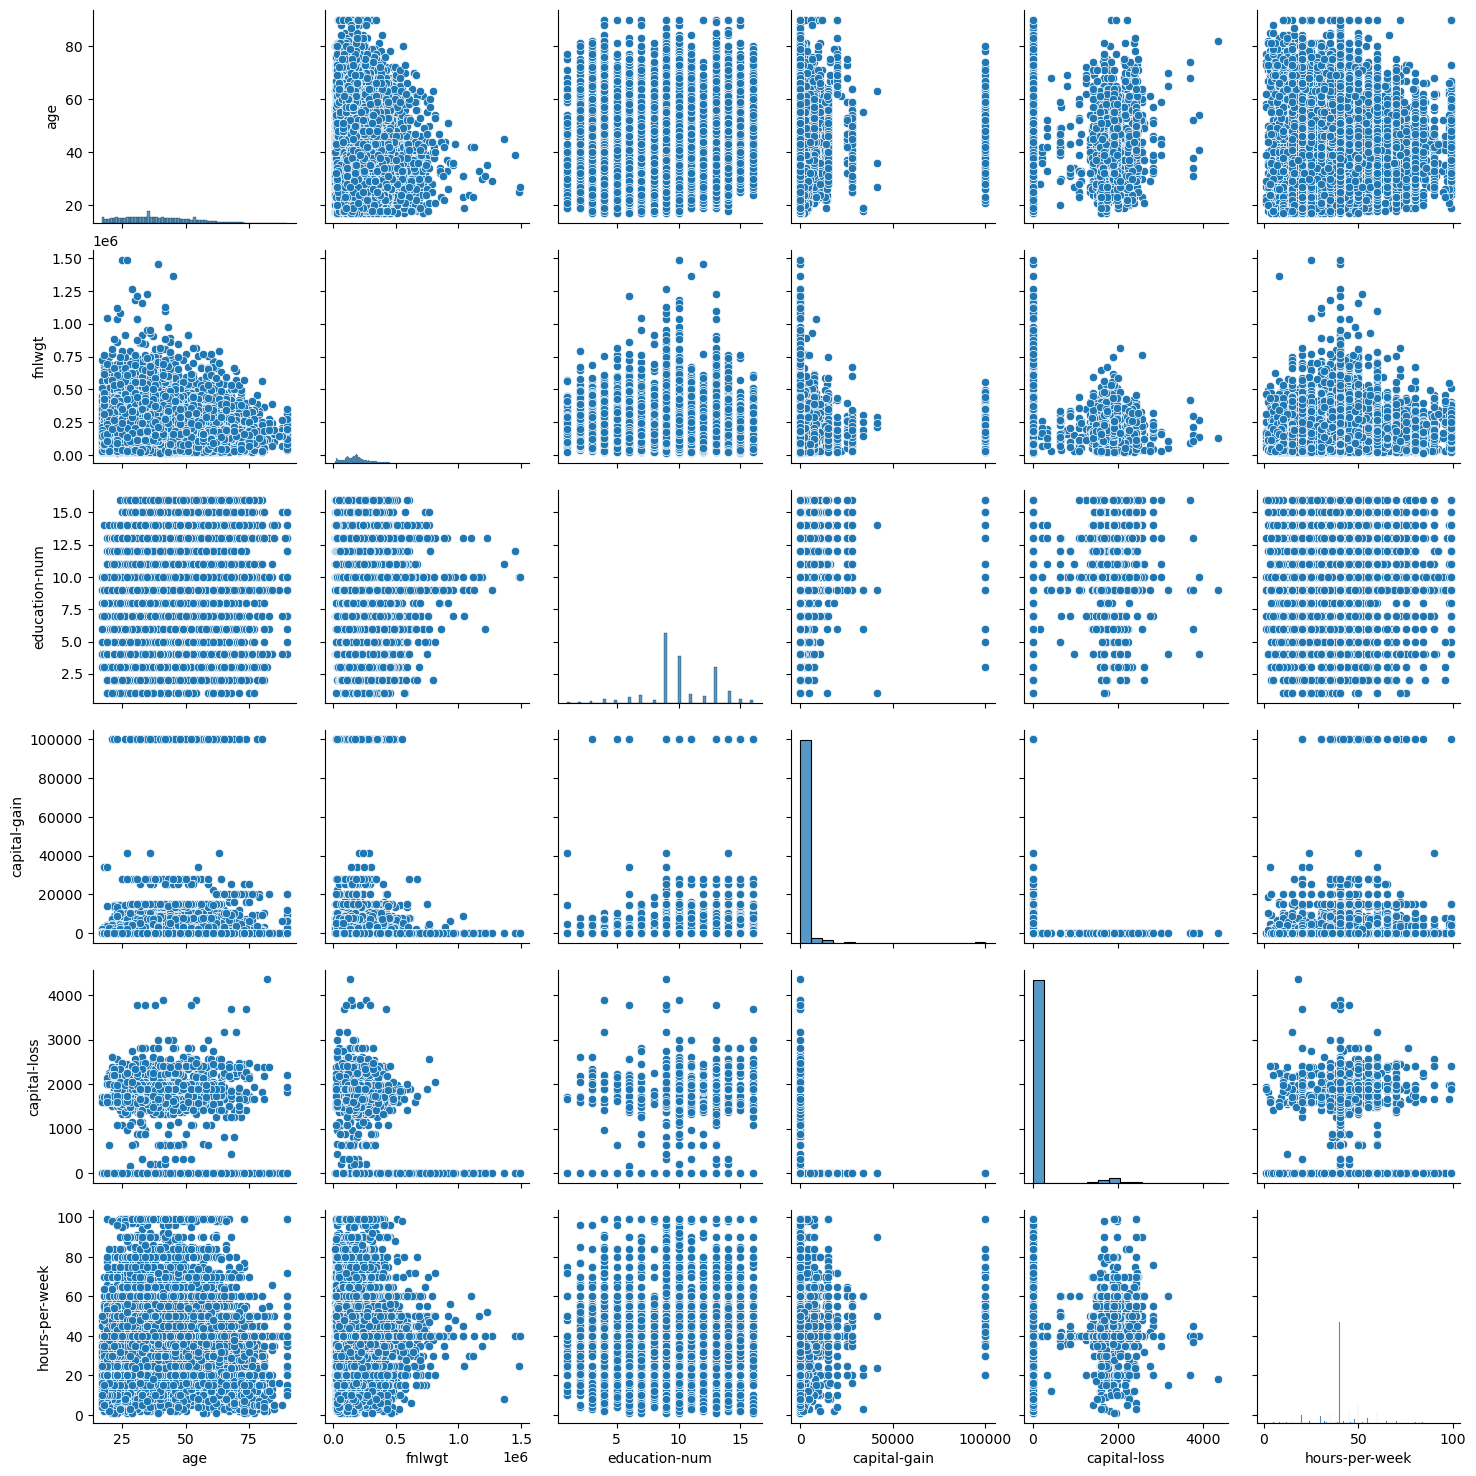

In [327]:
# Lets check out a pairplot between all the numerical features
sns.pairplot(df[numerical_feature])

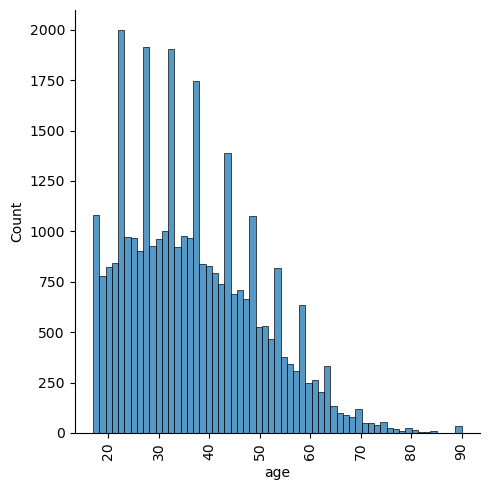

In [328]:
## let's check out the workclass and age 
# Since the majority of the workclass is in private let us explore this section
sns.displot(data = df[df['workclass']=='Private'],x = 'age')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Observation
 - This follows a right skewed data and almost all the distribution is towards the age group below 50 which is understandable

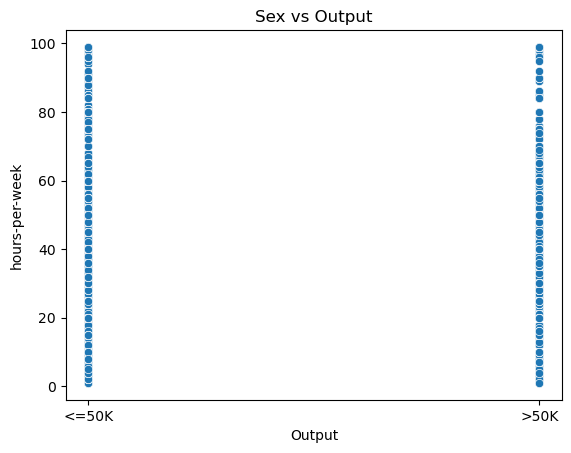

In [329]:
## Lets check out the relationship betweem hours per week vs the Output
sns.scatterplot(data=df,y = 'hours-per-week',x = 'Output')
plt.title("Sex vs Output")
plt.show()

### Observation
- Both the data is evenly distributed as per the details,there isn't much anomaly observed

### Comparing categorical variables with output

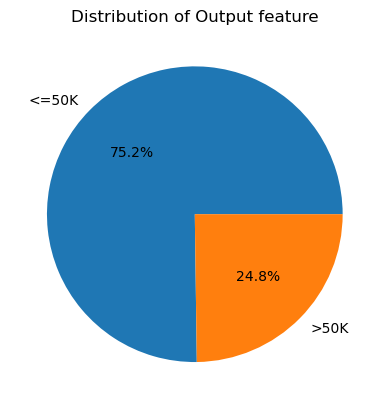

In [330]:
#Let's compare the distribution of out output variable
percentage = df.Output.value_counts(normalize = True)*100
plt.pie(percentage,labels = ['<=50K','>50K'],autopct='%1.1f%%')
plt.title("Distribution of Output feature")
plt.show()

### Observation
 We can` clearly see this is an imbalanced dataset, there is more data for <=50K

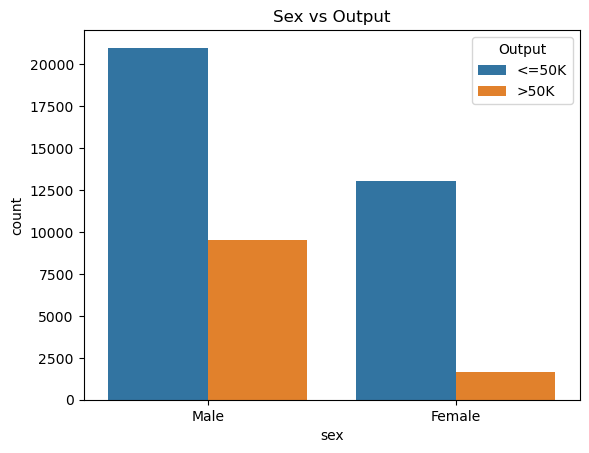

In [331]:
## Let's check out the relationship between the sex and our output column
sns.countplot(data=df,x ='sex',hue = 'Output')
plt.title("Sex vs Output")
plt.show()

### Observation
- We can see the ratio of Males having income >50K is more than that of the females

In [332]:
## Lets check out the relationship between the marital status and the Output
count = df.groupby("marital-status")['marital-status'].count()
count_temp = count[count>6000].index
filtered_df = df[df['marital-status'].isin(count_temp)]
filtered_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: xlabel='marital-status', ylabel='count'>

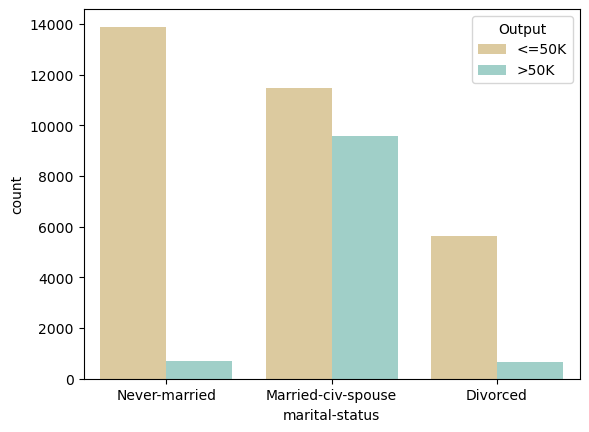

In [333]:
sns.countplot(data = filtered_df,x = 'marital-status',hue = 'Output',palette='BrBG')

### Observation
- we can clearly see the ratio of married-civ-spouse is much greater for >50K
- Ration of Never Married for >50K is much low among all the categories

<Axes: xlabel='workclass', ylabel='count'>

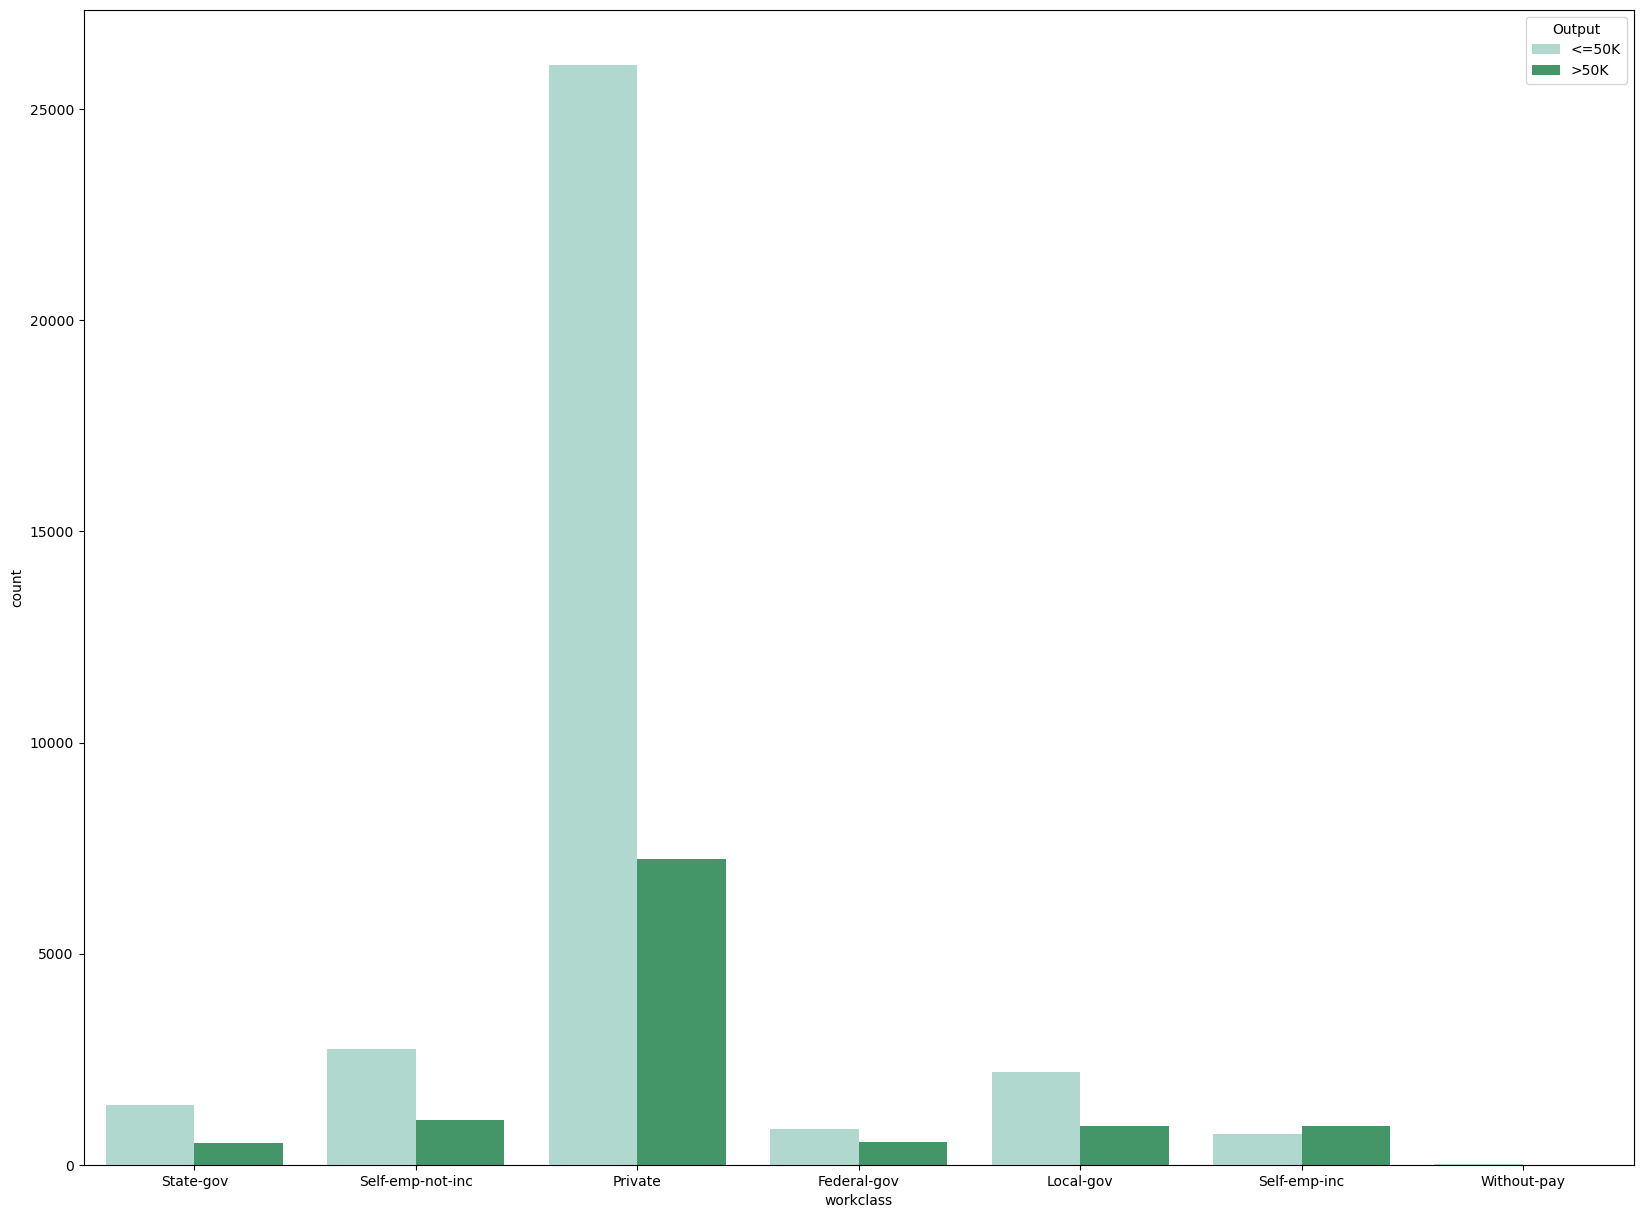

In [334]:
#checking out graphs for workclass and Output
plt.figure(figsize= (20,15))
sns.countplot(data = df,x = 'workclass',hue= 'Output',palette='BuGn')

### Observation
- It is clear that in case of Self-emp-inc the ration is greater for >50K.
- Also ratio of federal-gov workclass and local -gov are also comparitively very good for having income greater that 50K.


<Axes: xlabel='education', ylabel='count'>

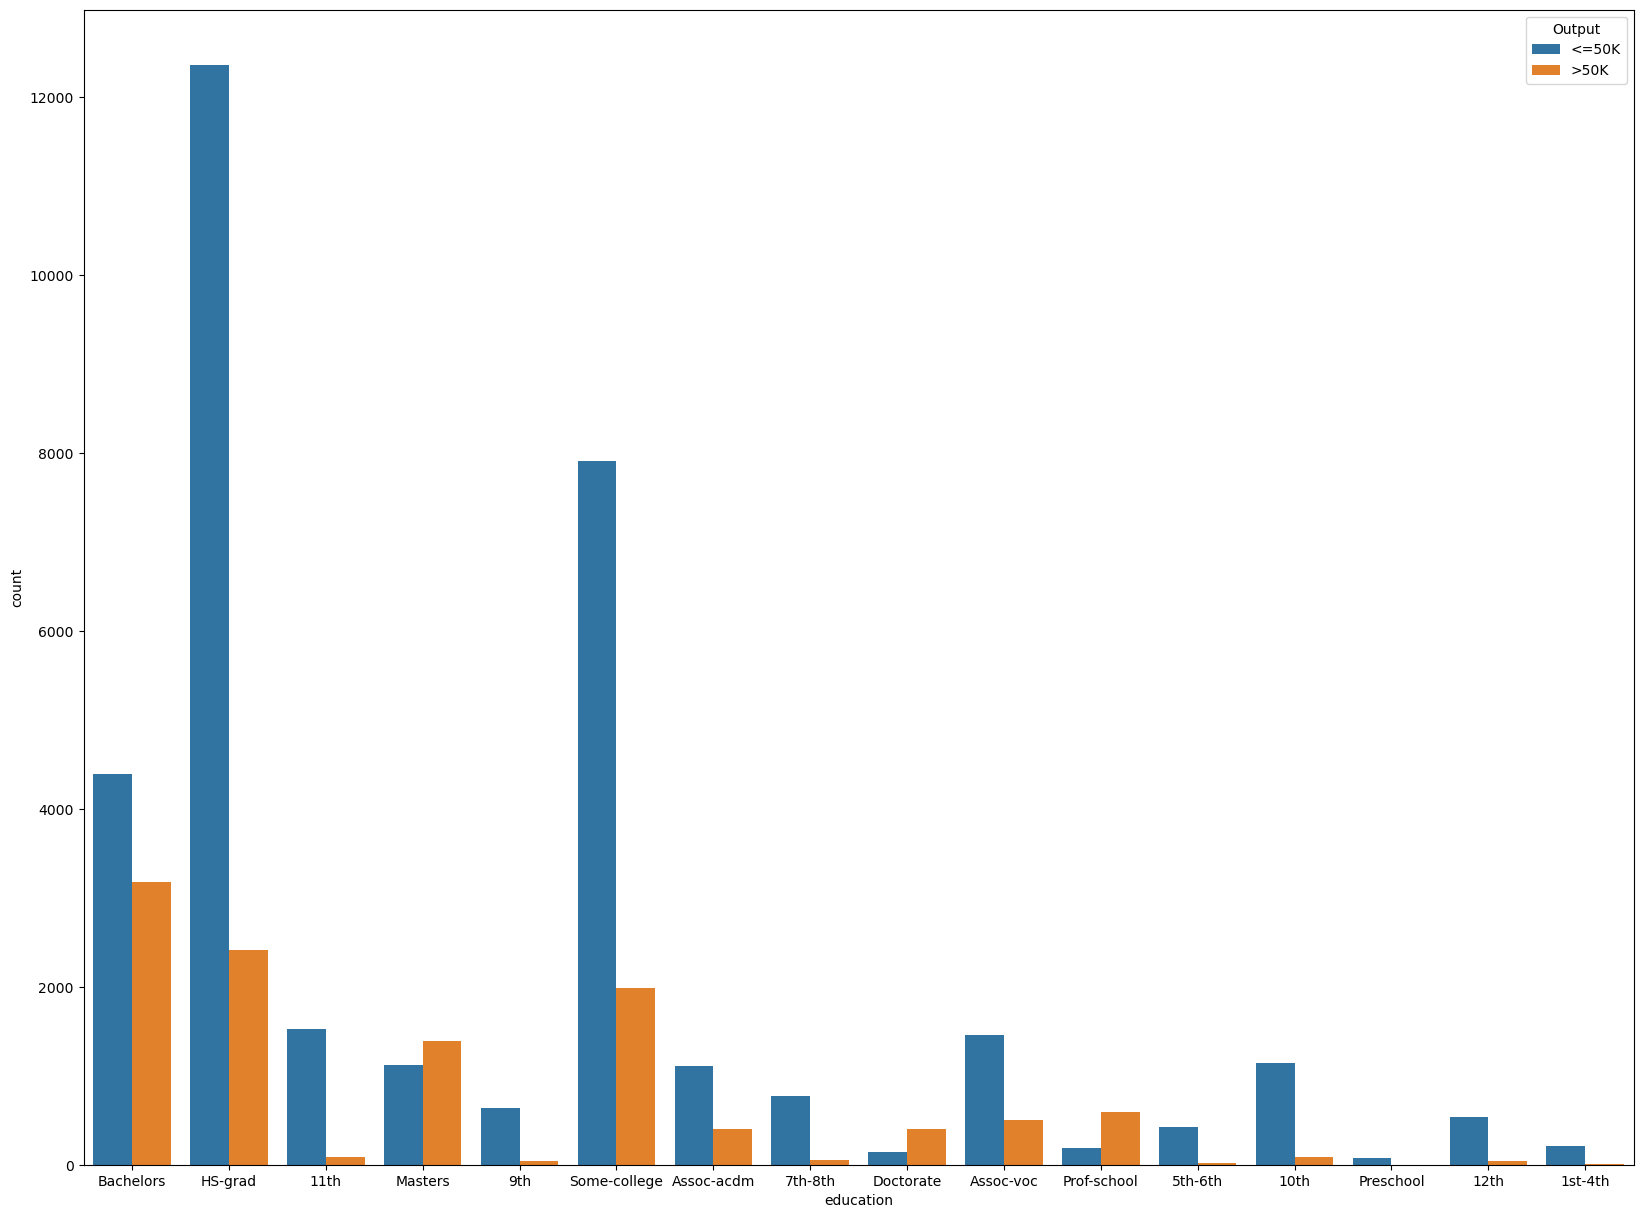

In [335]:
#Checking out graph for Education vs Output
plt.figure(figsize= (20,15))
sns.countplot(data = df,x = 'education',hue= 'Output')

### Observation
- It is very evident that education plays an important role in determining if the salary is more than 50K or not.
- All of Bachelors , Masters and Prof-schoool have very good ratio for having salary more than 50K

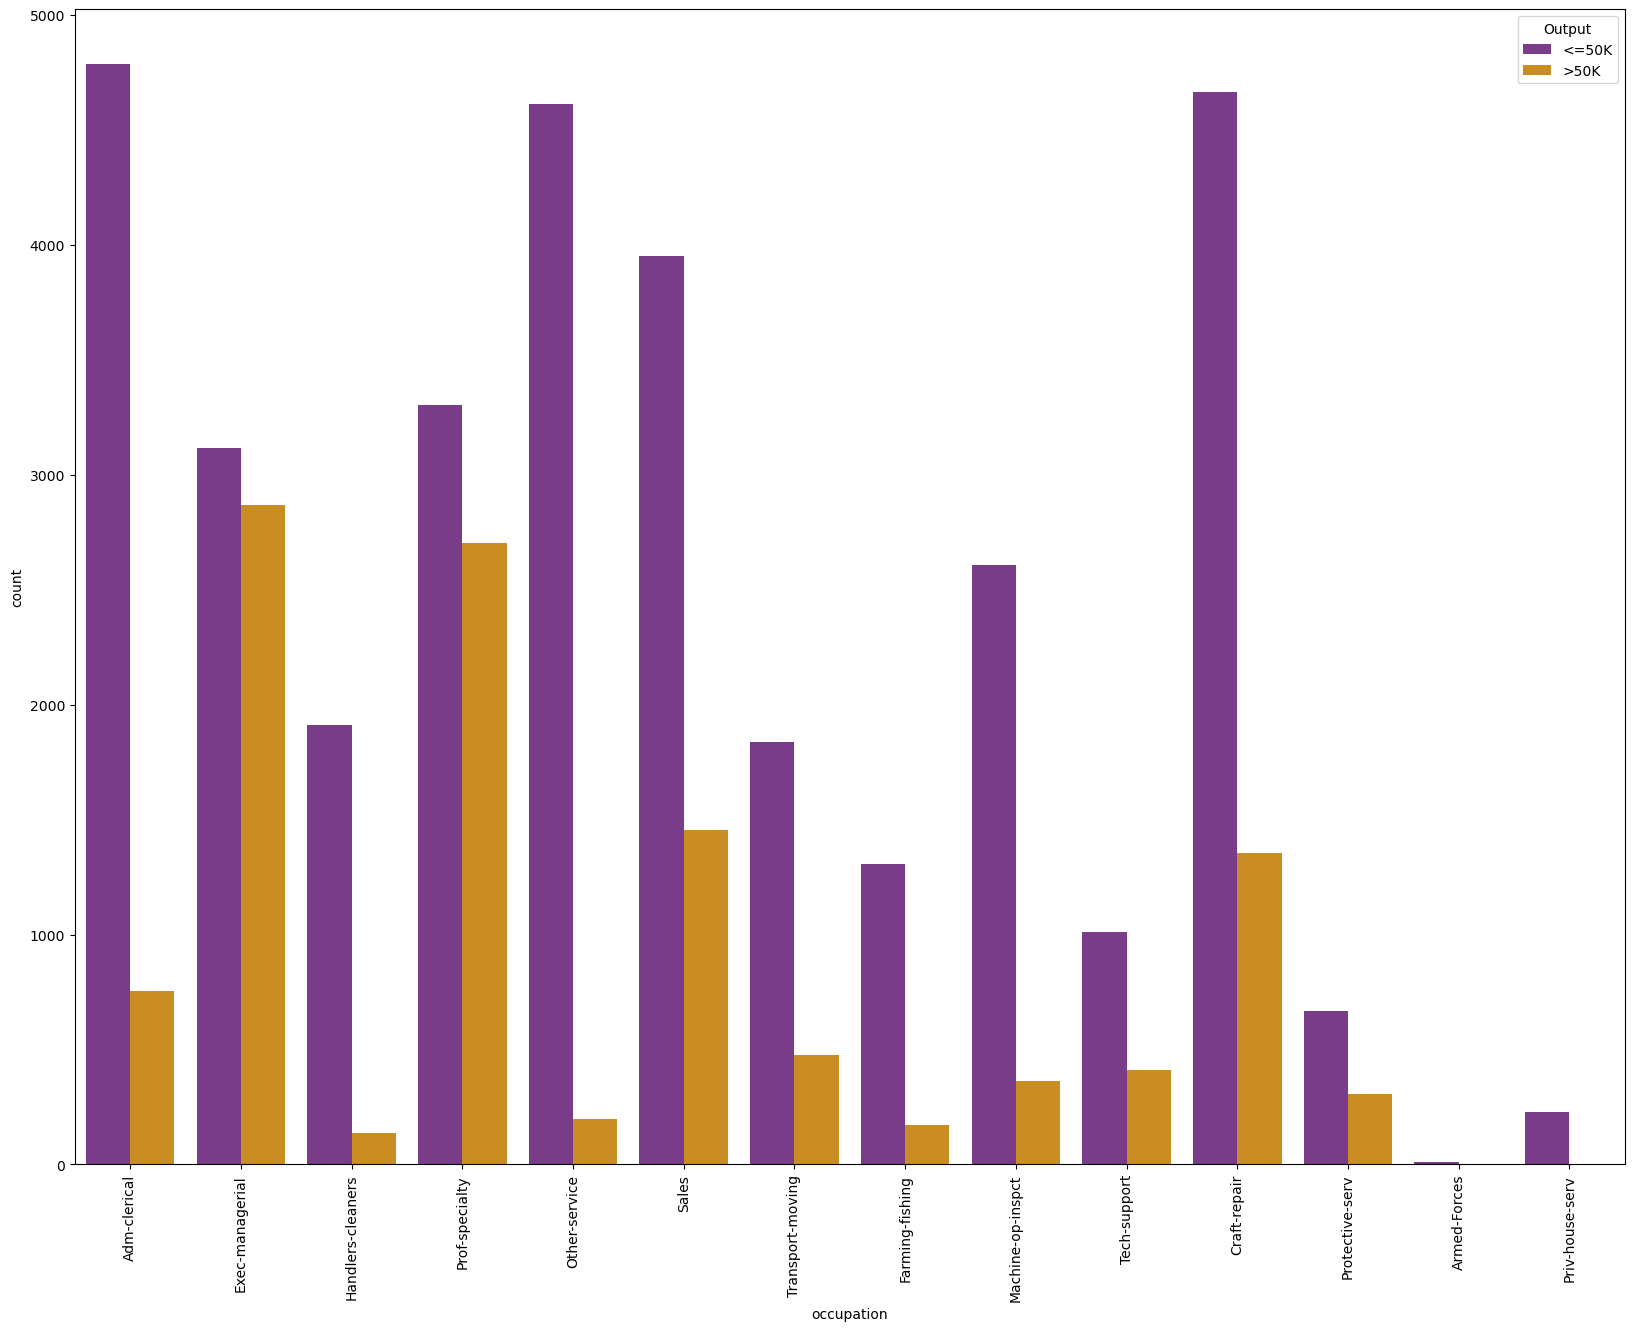

In [336]:
#Graph for Occupation and output
plt.figure(figsize= (20,15))
sns.countplot(data = df,x = 'occupation',hue= 'Output',palette='CMRmap')
plt.xticks(rotation = 90)
plt.show()

### Observation
- People at Exec-managerial and prof-sepciality has comparitively very good ratio for getting salary for more than 50K

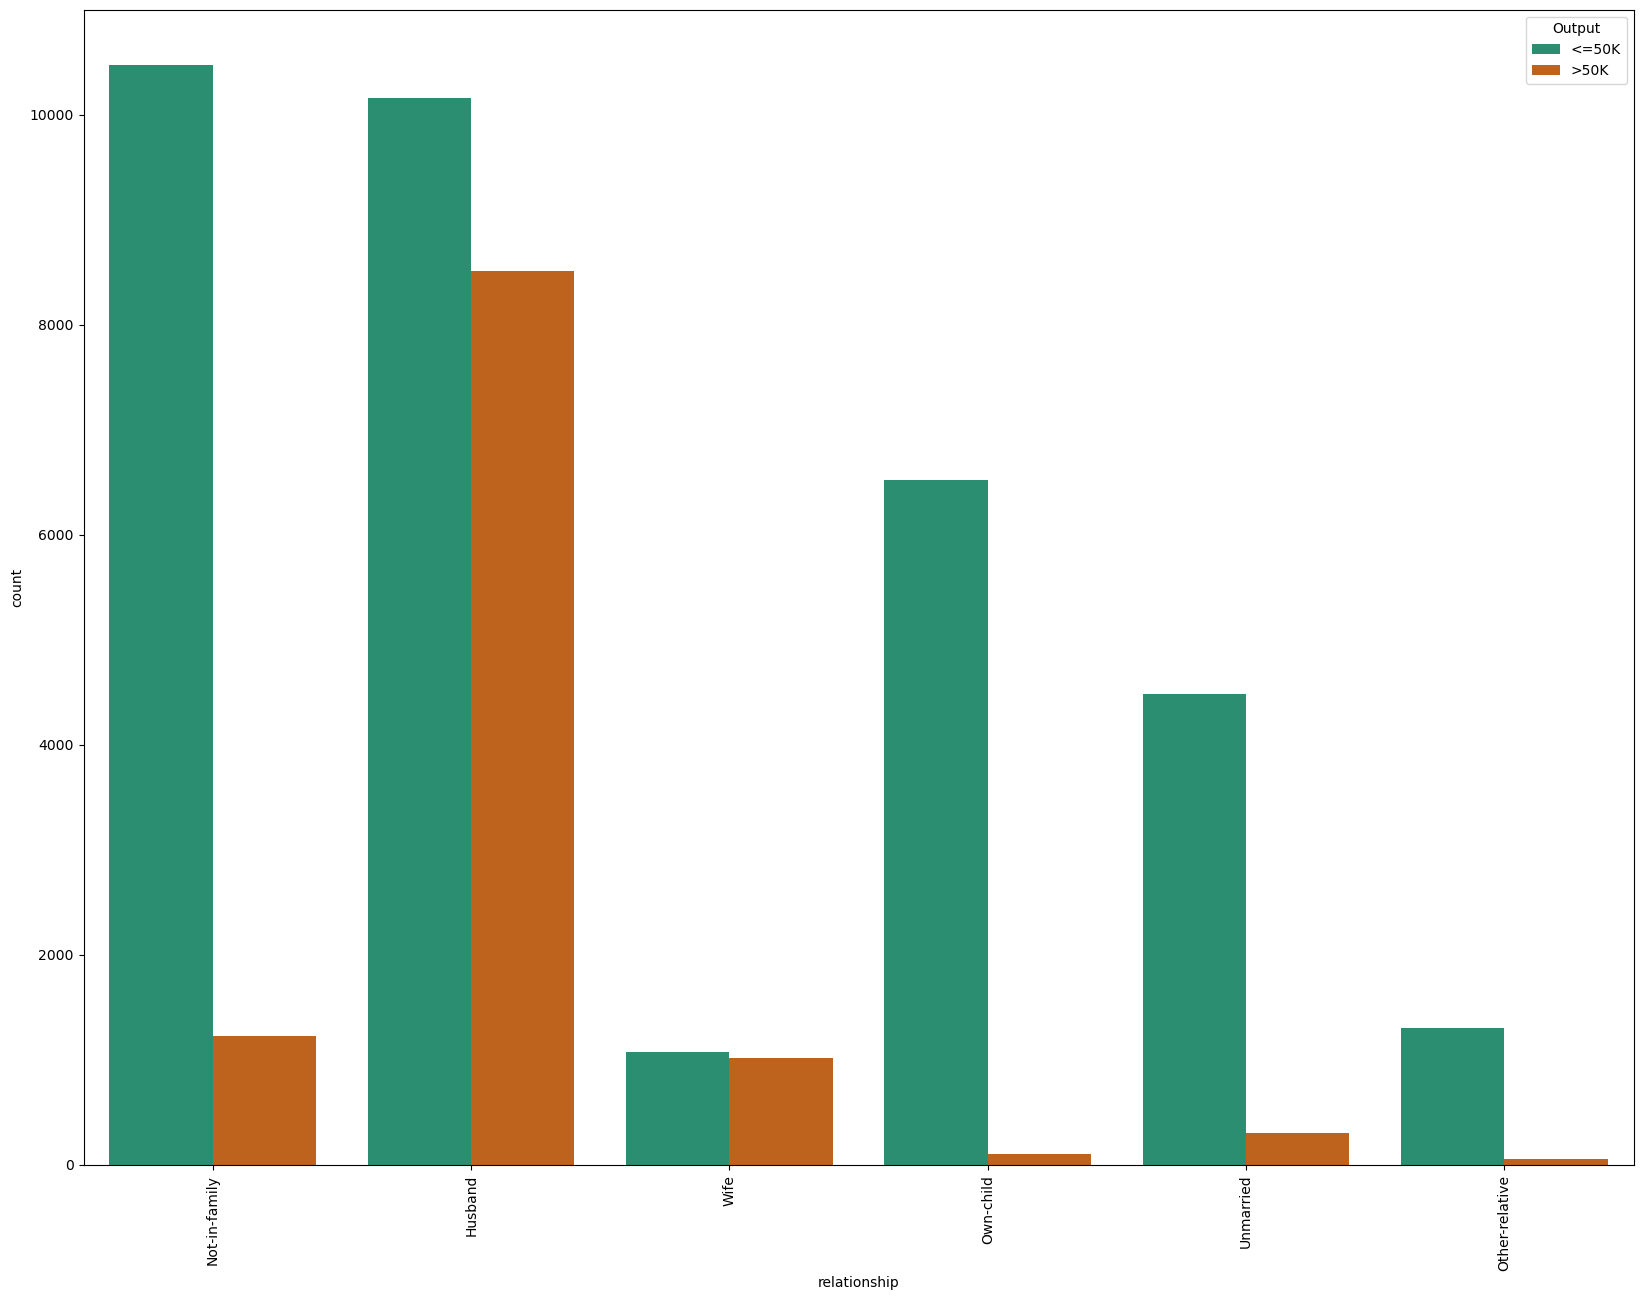

In [337]:
#Graph for relationship vs Output
plt.figure(figsize= (20,15))
sns.countplot(data = df,x = 'relationship',hue= 'Output',palette='Dark2')
plt.xticks(rotation = 90)
plt.show()

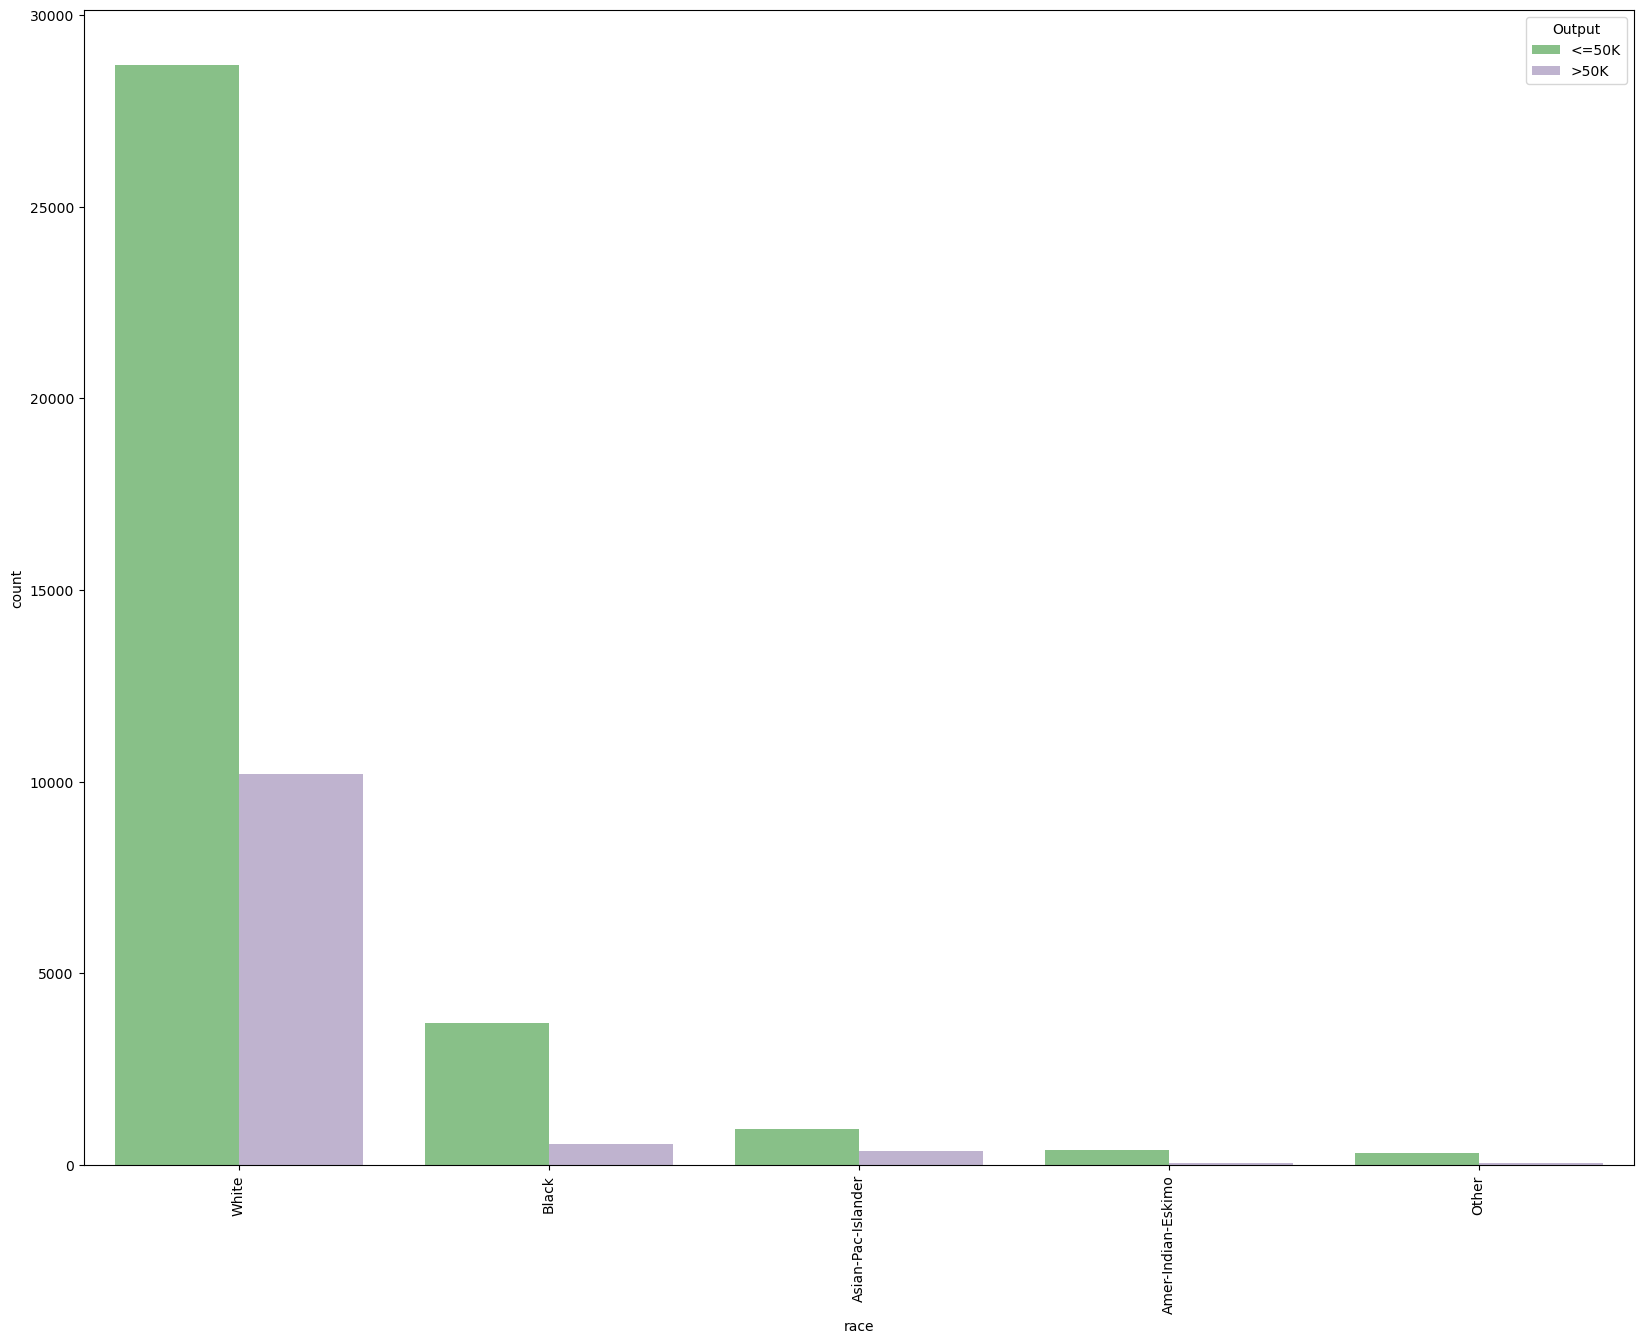

In [338]:
# Graph for Race vs Output
plt.figure(figsize= (20,15))
sns.countplot(data = df,x = 'race',hue= 'Output',palette='Accent')
plt.xticks(rotation = 90)
plt.show()

### Observation
- Clearly White race is dominating in the graph since data contains majority of the US native people

In [339]:
#Graph for Native-Country vs Output ignoring the US native people
plt.figure(figsize= (20,15))
count = df['native-country'].value_counts()
count_temp = count[count<1000].index
filtered_data = df[df['native-country'].isin(count_temp)]

<Figure size 2000x1500 with 0 Axes>

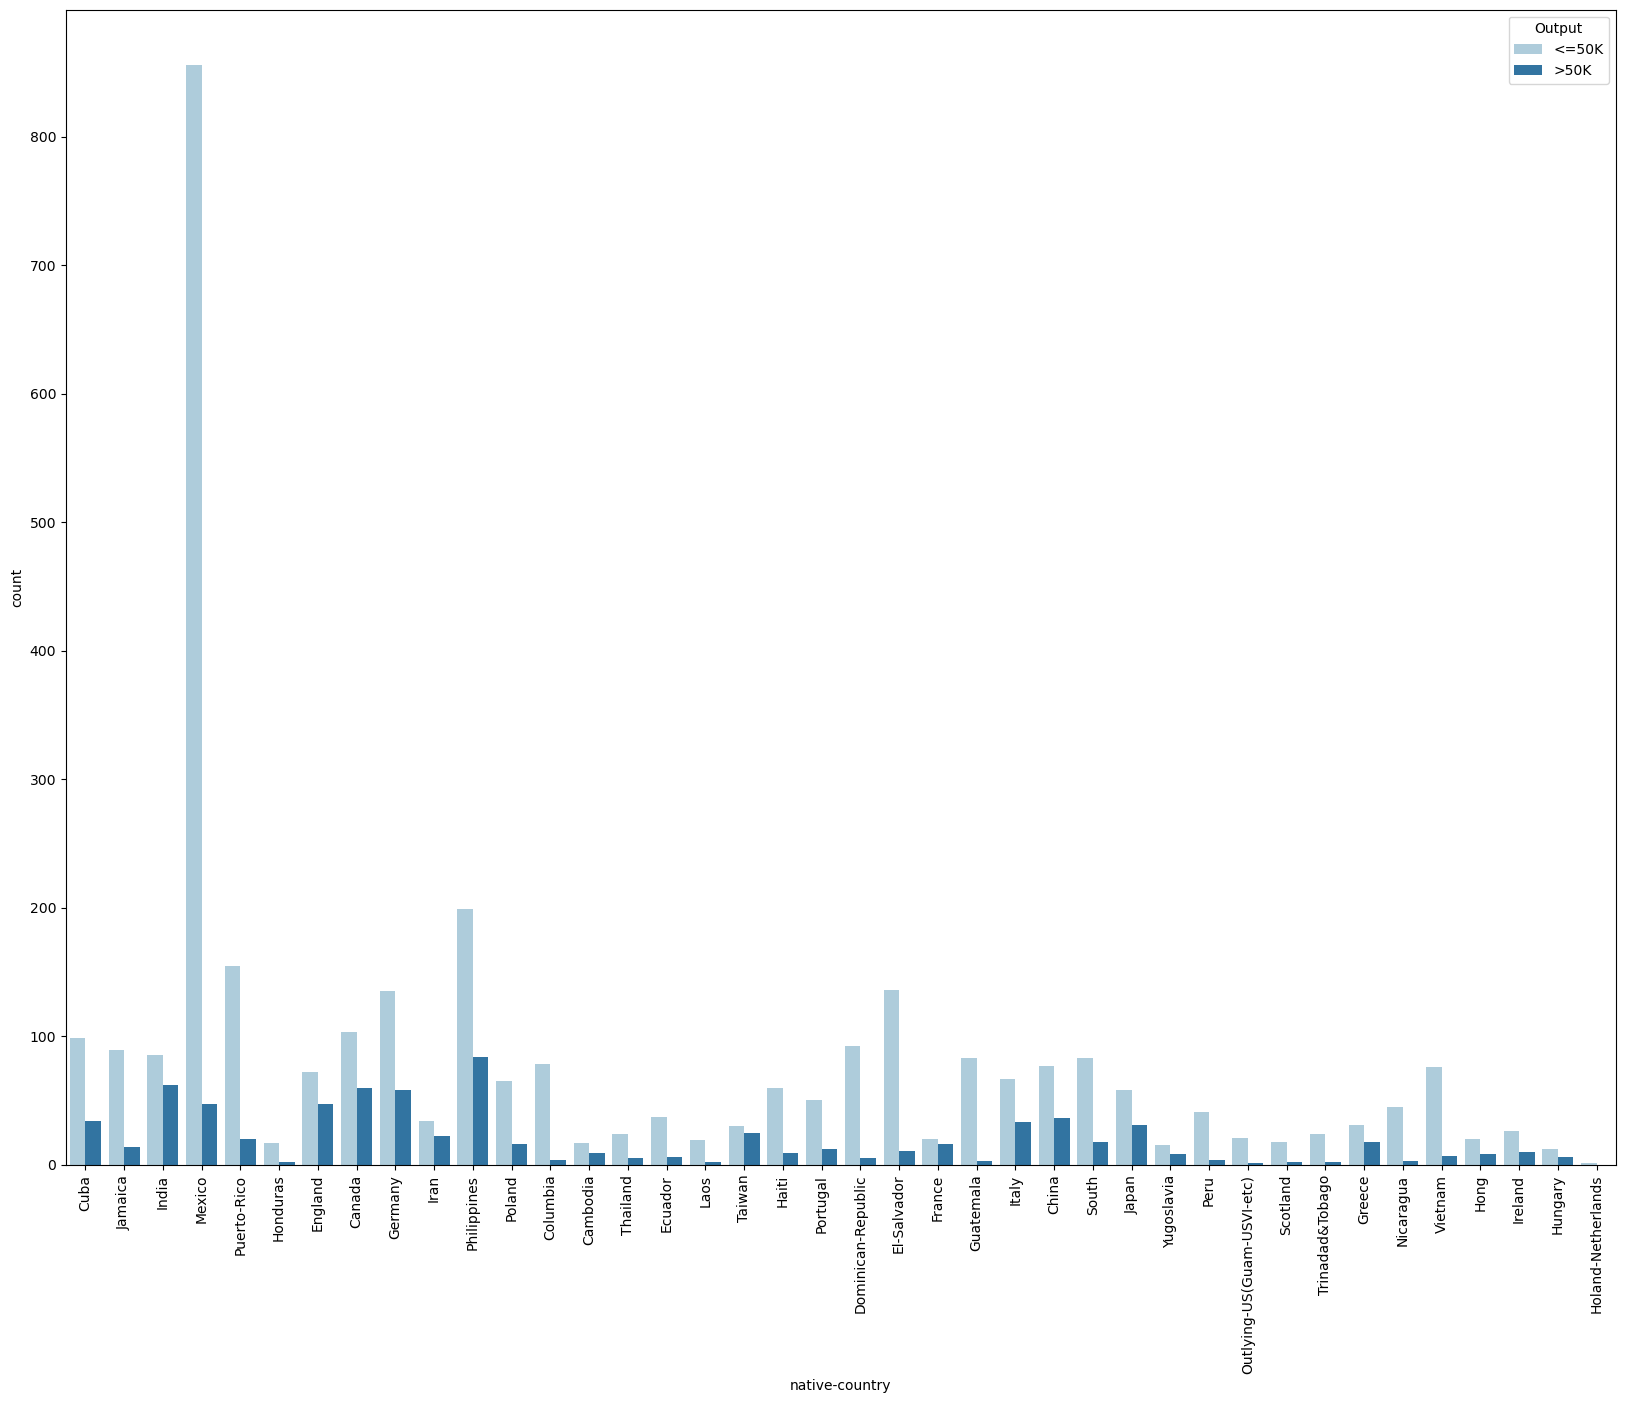

In [340]:
plt.figure(figsize = (20,15))
sns.countplot(data = filtered_data,x = 'native-country',hue= 'Output',palette='Paired')
plt.xticks(rotation = 90)
plt.show()

### Observation
- The native people of India,Iran,Cambodia,Taiwan,France,Greece all have good ratio of making more than 50K.

<Axes: >

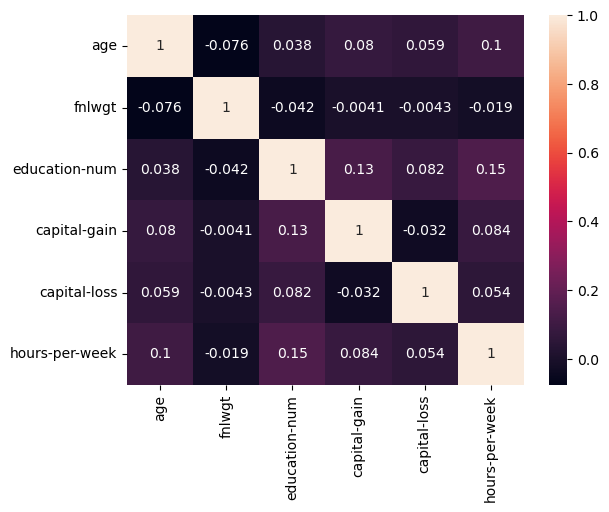

In [341]:
# Lets also check out the heatmap of numerical features
sns.heatmap(df[numerical_feature].corr(),annot = True)

### Observation
- No highly correlated features are there in the heatmap

# 3. Feature Engineering

In [342]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 3.1 Encoding categorical features first

In [343]:
categorical_feature

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [344]:
# importing libraries
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
#encoding all the categorical features using LabelEncoder
for feature in categorical_feature:
    df[feature] = label.fit_transform(df[feature])

In [345]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Output
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K


### 3.2 Standardization of numerical features

In [349]:
# importing StandarScaler module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Standardizing the values
df[numerical_feature] = scaler.fit_transform(df[numerical_feature])

In [350]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Output
0,0.034201,5,-1.062295,9,1.128753,4,0,1,4,1,0.142888,-0.21878,-0.078120,38,<=50K
1,0.866417,4,-1.007438,9,1.128753,2,3,0,4,1,-0.146733,-0.21878,-2.326738,38,<=50K
2,-0.041455,2,0.245284,11,-0.438122,0,5,1,4,1,-0.146733,-0.21878,-0.078120,38,<=50K
3,1.093385,2,0.425853,1,-1.221559,2,5,0,2,1,-0.146733,-0.21878,-0.078120,38,<=50K
4,-0.798015,2,1.407393,9,1.128753,2,9,5,2,0,-0.146733,-0.21878,-0.078120,4,<=50K


### 3.3 Converting the output column as 0 and 1 

In [351]:
df.Output.unique()

array(['<=50K', '>50K'], dtype=object)

In [352]:
df['Output'] = np.where(df.Output=='<=50K',0,1)

In [353]:
df.Output.unique()

array([0, 1])

In [354]:
## splitting out data into independent feature and dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [356]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: Output, Length: 45222, dtype: int32

In [357]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.034201,5,-1.062295,9,1.128753,4,0,1,4,1,0.142888,-0.21878,-0.078120,38
1,0.866417,4,-1.007438,9,1.128753,2,3,0,4,1,-0.146733,-0.21878,-2.326738,38
2,-0.041455,2,0.245284,11,-0.438122,0,5,1,4,1,-0.146733,-0.21878,-0.078120,38
3,1.093385,2,0.425853,1,-1.221559,2,5,0,2,1,-0.146733,-0.21878,-0.078120,38
4,-0.798015,2,1.407393,9,1.128753,2,9,5,2,0,-0.146733,-0.21878,-0.078120,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-0.419735,2,0.525154,9,1.128753,4,9,3,4,1,-0.146733,-0.21878,-0.078120,38
48837,0.034201,2,0.243135,9,1.128753,0,9,1,4,0,-0.146733,-0.21878,-0.411249,38
48839,-0.041455,2,1.753613,9,1.128753,2,9,0,4,1,-0.146733,-0.21878,0.754701,38
48840,0.412481,2,-1.001947,9,1.128753,0,0,3,1,1,0.579985,-0.21878,-0.078120,38


# 4. Model Building

### 4.1 Logistic Regression

In [358]:
## splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [380]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\Prince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [381]:
y_pred = log_reg.predict(X_test)

### Accuracy 

In [382]:
# checking out the accuracy score 
from sklearn.metrics import accuracy_score

In [384]:
accuracy_score(y_test,y_pred)

0.822141962113953

### Confusion Matrix

In [385]:
#importing library
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[9598,  595],
       [1818, 1556]], dtype=int64)

In [387]:
true_positive = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

### Precision

In [388]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9416266064946532

### Recall

In [389]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.840749824807288

### F2 score

In [393]:
F2_score = 5*(Precision*Recall)/(Precision+Recall)
F2_score

2.220833911796011

# 4.2 SVC Algorithm 

In [396]:
from sklearn.svm import SVC
model_2 = SVC()

In [397]:
model_2.fit(X_train,y_train)

SVC()

In [398]:
y_pred = model_2.predict(X_test)

### Accuracy

In [399]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8063683938969558

### Confusion Matrix

In [400]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[10012,   181],
       [ 2446,   928]], dtype=int64)

In [401]:
true_positive = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

### Precision

In [402]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9822427155891298

### Recall

In [403]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8036602986033071

### F2 score

In [404]:
F2_score = 5*(Precision*Recall)/(Precision+Recall)
F2_score

2.210056951127986

### 4.2.1 Hyperparameter tuning using Gridsearch CV

In [405]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator =model,param_grid=parameters,
                           scoring = "accuracy",cv =7 ,n_jobs=-1)

In [ ]:
grid_search = grid_search.fit(X_train,y_train)

In [ ]:
accuracy = grid_search.best_score_
accuracy

In [ ]:
grid_search.best_params_

In [ ]:
model_3 = SVC()
model.fit(X_train,y_train)
y_pred = model_3.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy